In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import tree
from sklearn import cross_validation
import datetime
import time
import numpy as np
import csv

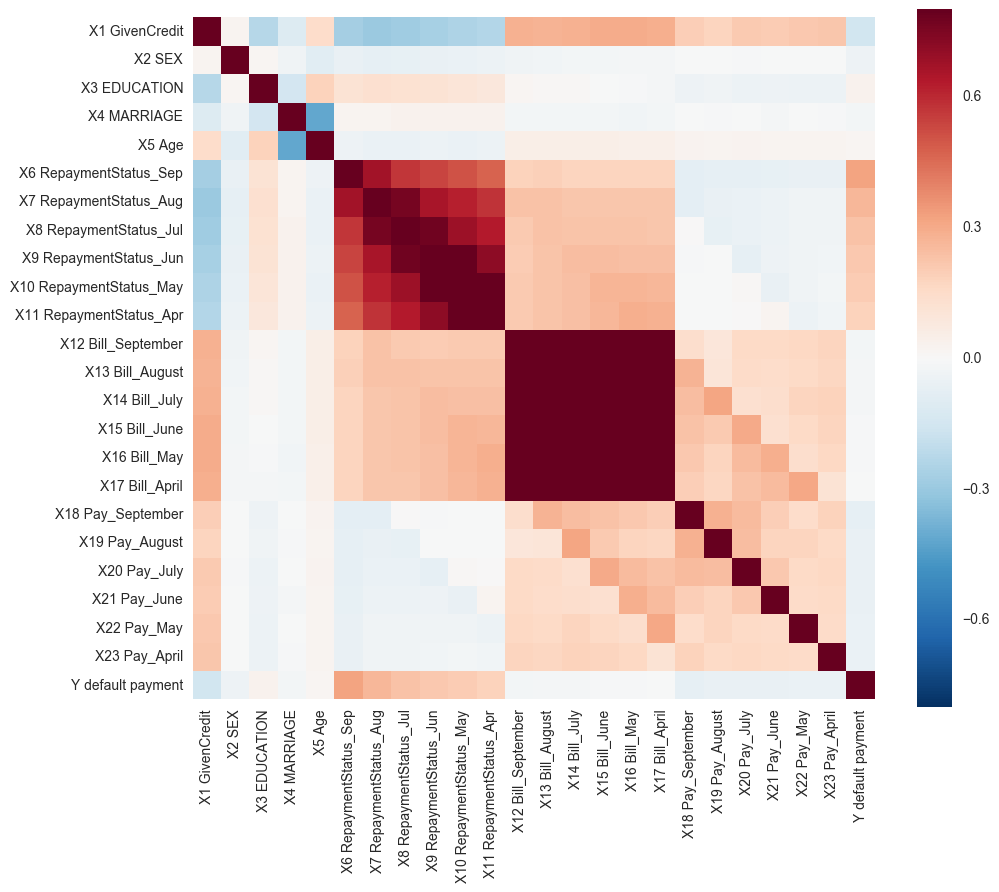

In [4]:
# correlation heatmap for nominal sttributes

sns.set(style="white")

# Load the datset of correlations between cortical brain networks
df = pd.read_csv(r".\DefaultOfCreditCardClients_num.csv",sep = ",")
corrmat = df.corr()
# print(corrmat)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [5]:
# Slicing nominal attributes

df_preprocessing = pd.read_csv(r".\DefaultOfCreditCardClients_num.csv",sep = ",")
nominal_number = df_preprocessing.iloc[:,1:11]
# nominal_number = nominal_number.drop('X5', 1)
nominal_number = pd.read_csv(r".\rest_num.csv",sep = ",")
nominal_text = pd.read_csv(r".\rest_nom.csv",sep = ",")
target = nominal_text['Y default payment next month']
nominal_text= nominal_text.drop('Y default payment next month', 1)

In [6]:
# ZeroR classifier with all nominal data
# get model

start_time = time.time()
accuracy_zeroR = "{0:.2f}%".format((target=='No').sum()/30000 * 100)
print("ZeroR model using gives %.6s accuracy" % (accuracy_zeroR))
load_time = time.time() - start_time
print("It took %.4s seconds to form model" % (load_time))

ZeroR model using gives 77.88% accuracy
It took 0.00 seconds to form model


In [7]:
## Select the attribute for OneR
start_time = time.time()
# Using just nominal attributes
nominal_number = np.array(nominal_number)

Y = nominal_number[:,9]
correlation_nom = [0]*9

with open('rest_num.csv', newline='') as f:
    reader = csv.reader(f)
    attr_nom = next(reader)
    
for i in range(len(nominal_number[0,:])-1):
    correlation_nom[i] = np.corrcoef(nominal_number[:,i],Y)[1,0]

max_index_nom = correlation_nom.index(max(correlation_nom))
selected_oneR_nom = attr_nom[correlation_nom.index(max(correlation_nom))]
print("The selected attribute for OneR classification of nominal dataset is %.30s." % (selected_oneR_nom))

# Using all attributes
df = np.array(df)
correlation_all = [0]*23

with open('all_withoutY.csv', newline='') as f:
    reader = csv.reader(f)
    attr_all = next(reader)
    
for i in range(len(df[0,:])-1):
    correlation_all[i] = np.corrcoef(df[:,i],Y)[1,0]
max_index_all = correlation_all.index(max(correlation_all))
selected_oneR_all = attr_all[correlation_all.index(max(correlation_all))]
print("The selected attribute for OneR classification of whole dataset is %.30s." % (selected_oneR_nom))
print()
print("The correlation with target attribute is")
print(correlation_all)


The selected attribute for OneR classification of nominal dataset is X6 RepaymentStatus_Sep.
The selected attribute for OneR classification of whole dataset is X6 RepaymentStatus_Sep.

The correlation with target attribute is
[-0.15351987639350761, -0.039960577705441661, 0.033842229825675786, -0.024339215683404278, 0.013889834301963198, 0.32479372847862187, 0.26355120167216484, 0.23525251372491571, 0.21661363684242427, 0.20414891387616621, 0.1868663616535452, -0.019644197143221558, -0.014193218088215718, -0.014075518043214757, -0.010156495880289683, -0.0067604638410147097, -0.0053723149148155068, -0.072929487777851409, -0.058578706582900868, -0.056250350990331134, -0.056827400892887632, -0.055123515621088484, -0.053183340326128072]


In [8]:
X6 = df[:,5]
A = [0] * 11
B = [0] * 11
for j in [-2,-1,0,1,2,3,4,5,6,7,8]:
    A[j+2] = ((X6==j) & (Y==0)).sum()
    B[j+2] = ((X6==j) & (Y==1)).sum()
print(A)
print(B)


predict = 0
for i in range(9):
    if A[i] > B[i]:
        predict = predict + B[i]
    else:
        predict = predict + A[i]

accuracy_oneR = '{:.2%}'.format((30000.-predict)/30000.)
print("OneR model with X6 gives %.6s accuracy" % (accuracy_oneR))
load_time = time.time() - start_time
print("It took %.4s seconds to form model" % (load_time))
predict

[2394, 4732, 12849, 2436, 823, 78, 24, 13, 5, 2, 8]
[365, 954, 1888, 1252, 1844, 244, 52, 13, 6, 7, 11]
OneR model with X6 gives 81.99% accuracy
It took 0.66 seconds to form model


5402

In [9]:
start_time = time.time()
education = df[:,2]
bins = [1,2,3,4]
bins.sort()
A = [0] * len(bins)
B = [0] * len(bins)
for j in range(len(bins)):
    A[j] = ((education==bins[j]) & (Y==0)).sum()
    B[j] = ((education==bins[j]) & (Y==1)).sum()
print(A)
print(B)


predict = 0
for i in range(len(bins)):
    if A[i] > B[i]:
        predict = predict + B[i]
    else:
        predict = predict + A[i]

accuracy_oneR = '{:.2%}'.format((30000.-predict)/30000.)
print("OneR model with education gives %.6s accuracy on education." % (accuracy_oneR))
load_time = time.time() - start_time
print("It took %.4s seconds to form model" % (load_time))


[8549, 10700, 3680, 435]
[2036, 3330, 1237, 33]
OneR model with education gives 77.88% accuracy on education.
It took 0.00 seconds to form model


In [10]:
start_time = time.time()
credit_limit = df[:,0]
bins = list(set(df[:,0]))
bins.sort()
A = [0] * len(bins)
B = [0] * len(bins)
for j in range(len(bins)):
    A[j] = ((credit_limit==bins[j]) & (Y==0)).sum()
    B[j] = ((credit_limit==bins[j]) & (Y==1)).sum()
print(A)
print(B)


predict = 0
for i in range(len(bins)):
    if A[i] > B[i]:
        predict = predict + B[i]
    else:
        predict = predict + A[i]

accuracy_oneR = '{:.2%}'.format((30000.-predict)/30000.)
print("OneR model with credit limit gives %.6s accuracy on education." % (accuracy_oneR))
load_time = time.time() - start_time
print("It took %.4s seconds to form model" % (load_time))


[296, 2, 1278, 1042, 138, 2480, 592, 521, 1204, 485, 776, 456, 547, 572, 579, 923, 557, 454, 819, 180, 1258, 613, 380, 624, 509, 299, 434, 210, 424, 295, 459, 245, 268, 0, 152, 185, 199, 727, 63, 136, 156, 240, 66, 150, 73, 71, 135, 70, 69, 73, 56, 641, 17, 18, 9, 6, 15, 9, 8, 10, 5, 13, 11, 8, 6, 7, 3, 3, 3, 3, 1, 8, 5, 2, 2, 1, 4, 1, 2, 2, 1]
[197, 0, 698, 568, 92, 885, 233, 210, 363, 166, 272, 132, 179, 157, 170, 187, 137, 78, 176, 49, 270, 117, 89, 113, 110, 51, 87, 28, 69, 53, 95, 27, 44, 1, 21, 32, 32, 154, 8, 20, 18, 31, 12, 18, 10, 12, 26, 10, 11, 6, 8, 81, 2, 2, 1, 0, 6, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
OneR model with credit limit gives 77.88% accuracy on education.
It took 0.01 seconds to form model


In [11]:
# ## Decision tree

 
# attributes = df_preprocessing.drop('Y default payment',1)
# target_number = df_preprocessing['Y default payment']
 
# # Decision tree without preprocessing
# start_time = time.time()
# clf = tree.DecisionTreeClassifier(criterion='entropy')
 
# # 10 fold cross validation
# X_folds = np.array_split(attributes, 10)
# y_folds = np.array_split(target, 10)
# scores = list()
# nodes_number = list()
# for k in range(10):
# # We use 'list' to copy, in order to 'pop' later on
#     X_train = list(X_folds)
#     X_test  = X_train.pop(k)
#     X_train = np.concatenate(X_train)
#     y_train = list(y_folds)
#     y_test  = y_train.pop(k)
#     y_train = np.concatenate(y_train)
#     scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
#     clf.fit(X_train, y_train)
#     treeObj = clf.tree_
#     nodes_number.append(treeObj.node_count)
# print("Our J4.8 models have average %.4s nodes." % (np.mean(nodes_number)))
 
# accuracy_decisiontree =  '{:.2%}'.format(np.mean(scores))
# print("J4.8 model gives %.6s accuracy." % (accuracy_decisiontree))
 
# load_time = time.time() - start_time
# print("It took %.4s seconds to form model." % (load_time))


In [15]:
## Decision tree

 
attributes = df_preprocessing.drop('Y default payment',1)
target_number = df_preprocessing['Y default payment']
 
# Decision tree without preprocessing
start_time = time.time()
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_split=10)
 
# 10 fold cross validation
X_folds = np.array_split(attributes, 10)
y_folds = np.array_split(target, 10)
scores = list()
nodes_number = list()
for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
    clf.fit(X_train, y_train)
    treeObj = clf.tree_
    nodes_number.append(treeObj.node_count)

for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf,out_file='treeAll.dot') 
print("Our J4.8 models have average %.4s nodes." % (np.mean(nodes_number)))
 
accuracy_decisiontree =  '{:.2%}'.format(np.mean(scores))
print("J4.8 model gives %.6s accuracy." % (accuracy_decisiontree))
 
load_time = time.time() - start_time
print("It took %.4s seconds to form model." % (load_time))


Our J4.8 models have average 588. nodes.
J4.8 model gives 81.19% accuracy.
It took 13.4 seconds to form model.


In [13]:
## discretize data

continuousAttr = np.array(pd.read_csv(r".\continuous.csv",sep = ","))
for i in range(14):
    continuousAttr[:,i] = pd.cut(continuousAttr[:,i], bins=10,
                             labels=(np.linspace(1,10, num=10)))

nominal_number = np.delete(nominal_number,9,1)
all_discretize = np.column_stack((continuousAttr,nominal_number))


In [20]:
start_time = time.time()
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10)
# clf.fit(all_discretize,target)
# 10 fold cross validation
X_folds = np.array_split(all_discretize, 10)
y_folds = np.array_split(target, 10)
scores = list()
nodes_number = list()
for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
    clf.fit(X_train, y_train)
    treeObj = clf.tree_
    nodes_number.append(treeObj.node_count)
    
for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf,out_file='treeDis.dot') 

print("Our discretized J4.8 models have average %.4s nodes." % (np.mean(nodes_number)))
 
accuracy_decisiontree =  '{:.2%}'.format(np.mean(scores))
print("J4.8 model gives %.6s accuracy." % (accuracy_decisiontree))
 
load_time = time.time() - start_time
print("It took %.4s seconds to form model." % (load_time))

Our discretized J4.8 models have average 625. nodes.
J4.8 model gives 81.65% accuracy.
It took 2.45 seconds to form model.


In [27]:
start_time = time.time()
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 5
                                  ,min_samples_leaf = 10)
# clf.fit(all_discretize,target)
# 10 fold cross validation
X_folds = np.array_split(nominal_number, 10)
y_folds = np.array_split(target, 10)
scores = list()
nodes_number = list()
for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
    clf.fit(X_train, y_train)
    treeObj = clf.tree_
    nodes_number.append(treeObj.node_count)
    
for k in range(10):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf,out_file='treeDis.dot') 

print("Our discretized J4.8 models have average %.4s nodes." % (np.mean(nodes_number)))
 
accuracy_decisiontree =  '{:.2%}'.format(np.mean(scores))
print("J4.8 model gives %.6s accuracy." % (accuracy_decisiontree))
 
load_time = time.time() - start_time
print("It took %.4s seconds to form model." % (load_time))

Our discretized J4.8 models have average 59.6 nodes.
J4.8 model gives 82.11% accuracy.
It took 1.14 seconds to form model.


In [24]:
nominal_number


array([[ 2,  2,  1, ..., -1, -2, -2],
       [ 2,  2,  2, ...,  0,  0,  2],
       [ 2,  2,  2, ...,  0,  0,  0],
       ..., 
       [ 1,  2,  2, ..., -1,  0,  0],
       [ 1,  3,  1, ...,  0,  0, -1],
       [ 1,  2,  1, ...,  0,  0,  0]], dtype=int64)